In [1]:
from keras.datasets import cifar10
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#Loading data
df = pd.read_csv("communities.csv")
#Filling Missing Values
# print(df.head)
df_2 = df.replace("?", np.NaN)
df_2.fillna(df_2.median(), inplace=True)
# print(df_2)
#Column Drop
modDfObj = df_2.drop('Lakewoodcity', axis = 'columns', inplace = True)

In [4]:
# #Converting df_2 into numpy array
# df_2.apply(pd.to_numeric)
# # df_2_arr = np.array(df_2)
# # pd.to_numeric(df_2_arr) 
# # df_2.apply(LabelEncoder().fit_transform)

x = df_2.iloc[:, :-1].values.astype('float')
y = df_2.iloc[:, -1].values.astype('float')
# print(x)
# print(y)
# print(type(x[2][1]))
# print(df_2)

#Splitting data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# print(x_train)
# print(x.shape)
# print(y_train.shape)
# print(y_test.shape)
# print("\n")

# print(x_train)
# print(x_train.shape)
# print(y_train.shape)
# print(x_val.shape)
# print(y_val.shape)
# print("\n")
# print(x[1][1])
# print(type(x[1][1]))
# print(x)
# print(y)
#Model Define
def baseline_model():
    model = Sequential()
    model.add(Dense(12, input_shape = x.shape[1:], kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    #compile model
    model.compile(loss='mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
    return model
model = baseline_model()

In [5]:
#k-fold cross-validation

history = model.fit(x_train, y_train, epochs = 5, batch_size = 32, verbose = 1)
estimator = KerasRegressor(build_fn = baseline_model, epochs = 5, batch_size = 32, verbose = 1)
kfold = KFold(n_splits = 10)
results = cross_val_score(estimator, x_train, y_train, cv = kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

estimator.fit(x_train, y_train)
prediction = estimator.predict(x_test)
print("Test Set Error", np.mean(prediction))


Epoch 1/5
1594/1594 [==============================] - 0s 142us/step - loss: 11.2154 - mean_absolute_error: 2.1809
Epoch 2/5
1594/1594 [==============================] - 0s 90us/step - loss: 0.1163 - mean_absolute_error: 0.2524
Epoch 3/5
1594/1594 [==============================] - 0s 107us/step - loss: 0.0640 - mean_absolute_error: 0.1841
Epoch 4/5
1594/1594 [==============================] - 0s 90us/step - loss: 0.0649 - mean_absolute_error: 0.1856
Epoch 5/5
1594/1594 [==============================] - 0s 100us/step - loss: 0.0635 - mean_absolute_error: 0.1839
Epoch 1/5
1434/1434 [==============================] - 0s 243us/step - loss: 48.3746 - mean_absolute_error: 3.6223
Epoch 2/5
1434/1434 [==============================] - 0s 86us/step - loss: 0.1864 - mean_absolute_error: 0.3299
Epoch 3/5
1434/1434 [==============================] - 0s 84us/step - loss: 0.0711 - mean_absolute_error: 0.1945
Epoch 4/5
1434/1434 [==============================] - 0s 88us/step - loss: 0.0662 - mean

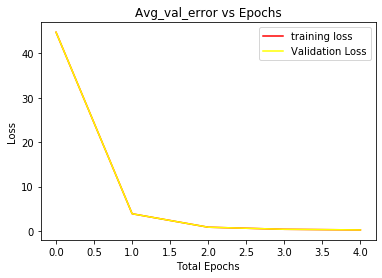

In [6]:
# print(history.history)
# print(list((np.array(cross_val_score)))
#Plot
k = 10
epochs = 5
model.save("Assignment3.h5")
# print(type(estimator))
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']
# train_mae = history.history['mae']
# val_mae = history.history['val_mae']

# avg_valid_error = []
# for i in range(k):
#     all_mae_history.append(history.history['val_mae'])
# avg_mae_hist = [np.mean([x[i] for x in all_mae_history]) for i in range(epochs)]

# a = []
# for i in range(k):
#     for j in range(epochs):
#         a.append(results[i][j])
# print(a)

# plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
# plt.xlabel('Epochs')
# plt.ylabel('Validation MAE')
# plt.show()
avg_val_error = [44.71691, 3.9026, 0.8764, 0.40892, 0.26892]
total_epochs = [i for i in range(epochs)]
# total_epochs = [i for i in range(epochs)]
plt.plot(total_epochs, avg_val_error, color = 'yellow', label = 'Validation Loss')
plt.title("Avg_val_error vs Epochs")
plt.xlabel('Total Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()